# Principal Component analysis(PCA) on wine datasets
 

## Dimensionality reduction
In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction

Feature Selection techniques are     - Backward Elimination .  Forward Selection . Bidirectional Elimination and Score Comparison ....



The following are Feature Extraction techniques:  - Principal Component Analysis (PCA) . Linear Discriminant Analysis (LDA)
.Kernel PCA   and  Quadratic Discriminant Analysis (QDA)

# PCA (Principal Component Analysis 

- From the m indepenndent variables of your dataset, PCA extracts p<= m new independent variables that explain the most the variance of the datset, regardless of the dependent variable. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.Simply PCA reduce the number of variables of a data set, while preserving as much information as possible. In the following section we apply PCA to wine datasets with 13 independent variables 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
dataset.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [3]:
# Split the data into Dependent variable(Y) and independent variable(X)
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The aim of feature scaling (standerdization) is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.

Z = (Value - Mean) /std


Once the standardization is done, all the variables will be transformed to the same scale.

In [6]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [7]:
# The following 13 principal components which is eaqual to the total number of features(variables) in the original datasets. 
# the first pca(0.36884109) explains 37% of the total variation in the datsets and the last pca(0.00696933) explains the least variation in the datasets ie .6%.
# The first two pca's explains 37% + 19% = 56% of the total variation in the datasets 
print(explained_variance)

[0.36884109 0.19318394 0.10752862 0.07421996 0.06245904 0.04909
 0.04117287 0.02495984 0.02308855 0.01864124 0.01731766 0.01252785
 0.00696933]


How PCA constructs the Principal Components? As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. 




Steps in constructing PCA's


## Covariance matrix 



Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables x, y, and z, the covariance matrix is a 3×3 matrix.

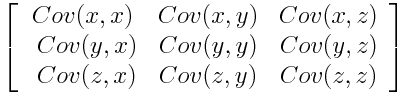




- Note:  
. The covariance of a variable with itself is its variance (Cov(a,a)=Var(a)) 
. Covariance is commutative (Cov(a,b)=Cov(b,a))
         
         
         
         

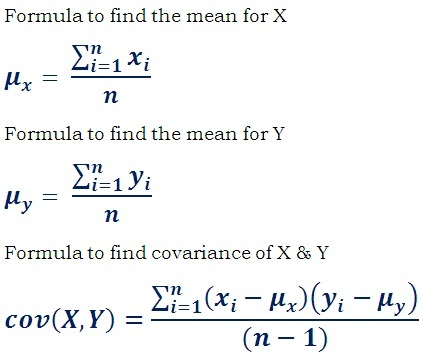



# What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?

It’s actually the sign of the covariance that matters :

 -- if positive then : the two variables increase or decrease together (correlated)


--- if negative then : One increases when the other decreases (Inversely correlated)

# Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

What you firstly need to know about eigenvalues and eigenvectors is that they always come in pairs, so that every eigenvector has an eigenvalue. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues. eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

In general, the eigenvector  V of a matrix A  is the vector for which the following holds:
  AV = hV
  
where  h is a scalar value called the ‘eigenvalue
   
   
   

By considering only the first two pca's (which explains 56% of the total variation), reset the kernel and run the above script for n_components = 2

In [6]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [7]:
# the new two variables in training datasets extracted from 13 original variables
print(X_train)

[[-2.17884511e+00 -1.07218467e+00]
 [-1.80819239e+00  1.57822344e+00]
 [ 1.09829474e+00  2.22124345e+00]
 [-2.55584748e+00 -1.66210369e+00]
 [ 1.85698063e+00  2.41573166e-01]
 [ 2.58288576e+00 -1.37668170e+00]
 [ 8.72876119e-01  2.25618512e+00]
 [-4.18384029e-01  2.35415681e+00]
 [-3.04977245e-01  2.27659433e+00]
 [ 2.14082532e+00 -1.10052871e+00]
 [-2.98136465e+00 -2.47159183e-01]
 [ 1.96188242e+00  1.25407738e+00]
 [-2.16177795e+00 -9.75966550e-01]
 [ 2.21976084e+00 -2.39507167e+00]
 [-2.30179529e+00 -2.05791962e-01]
 [-3.00953827e+00 -2.79141212e-01]
 [ 2.63443473e+00 -8.68313119e-01]
 [-1.09219965e+00 -3.53906625e+00]
 [ 2.62578435e+00 -2.96852840e-03]
 [ 1.98077342e-01  2.29193443e+00]
 [-2.67442753e+00 -2.58800132e+00]
 [-2.54763698e+00 -4.52703891e-01]
 [ 1.77416736e+00  8.43586940e-01]
 [-2.77786938e+00 -4.32090258e-01]
 [-2.86679938e+00 -1.87580875e+00]
 [ 1.35498845e+00  3.99545184e-02]
 [-2.43900474e+00  9.44074889e-02]
 [-2.27268121e+00  5.05883053e-01]
 [ 1.17887166e+00  2

In [9]:
# Fitting Logistic Regression to the Training set of newly extracted two independent variables to classfy into 3 groups of dependent variable y
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [15]:
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
# Here 3 by 3 confusion matrix
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


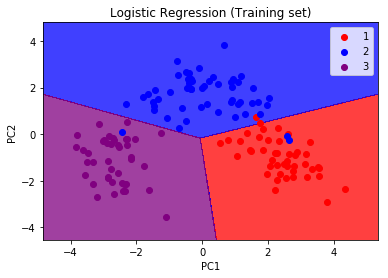

In [25]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'purple'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


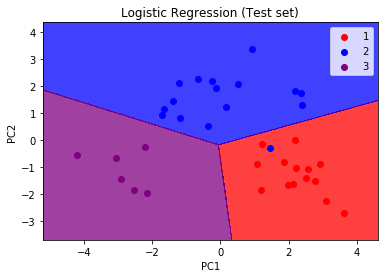

In [23]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'purple'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()